# **Telecom X (Parte 2) - Análise de Evasão de Clientes**
Parabéns! 🎉 Você foi promovido após seu excelente desempenho na análise exploratória da **evasão de clientes na Telecom X**. Sua dedicação, clareza na comunicação dos dados e visão estratégica fizeram a diferença.

Agora, você foi convidado a integrar oficialmente a equipe de **Machine Learning** da empresa!

Sua nova missão é desenvolver modelos **preditivos** capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer **antecipar o problema da evasão**, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

**O que será praticado:**

✅ Pré-processamento de dados para Machine Learning

✅ Construção e avaliação de modelos preditivos

✅ Interpretação dos resultados e entrega de insights

✅ Comunicação técnica com foco estratégico



# **Importando Bibliotecas**
Aqui estamos importando as bibliotecas que serão utilizadas no projeto:

* pandas e numpy para manipulação de dados;

* seaborn e matplotlib para visualização de dados;

* scikit-learn para modelagem e avaliação de machine learning. Essa etapa é essencial para termos todas as ferramentas necessárias no pipeline.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# **Carregando Dados**
Aqui foi carregado o arquivo CSV que contém os dados tratados.

Foi utilizado o mesmo arquivo na parte 1 do desafio Telecom X. Foi carregado o arquivo CSV que contém os dados tratados anteriormente. Na qual será feita um limpa e oraganização de dados.

In [7]:
url = "https://raw.githubusercontent.com/FernandaMancini/ONE---Oracle-Next-Education/main/Formacao-DataScience/Challenge3/Base-Challenge3-TelecomX2.csv"
df = pd.read_csv(url)
print(f"✅ Dados carregados com {df.shape[0]} linhas e {df.shape[1]} colunas.")

✅ Dados carregados com 7267 linhas e 22 colunas.


# **Limpeza de Dados**
Nessa parte, foi criado a função limpar_dados para:

* Remover colunas irrelevantes (ex.: IDs que não ajudam no modelo).

* Padronizar textos (tirar espaços, transformar em minúsculo).

* Ajustar tipos de dados (ex.: converter floats sem decimais para int).

Essa padronização evita problemas na modelagem e melhora a qualidade dos dados.

In [10]:
def limpar_dados(df):
    """Remove colunas inúteis, padroniza textos e ajusta tipos de dados."""
    if 'ID_Cliente' in df.columns:
        df = df.drop(columns=['ID_Cliente'])

    # Padronizar textos
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = df[col].astype(str).str.strip().str.lower()

    # Converter floats sem casas decimais para int
    for col in df.select_dtypes(include='float'):
        if (df[col] % 1 == 0).all():
            df[col] = df[col].astype(int)

    print("✅ Dados limpos e padronizados.")
    return df
df = limpar_dados(df)

✅ Dados limpos e padronizados.


# **Analisar Categorias**
Aqui foi identificado as colunas categóricas e a contagem de ocorrências para cada categoria.
Isso é importante para entender a distribuição dos dados e identificar possíveis desbalanceamentos.



In [23]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n📊 {col.upper()}:\n{df[col].value_counts()}")


📊 SEXO_CLIENTE:
Sexo_Cliente
masculino    3675
feminino     3592
Name: count, dtype: int64

📊 SERVICO_INTERNET:
Servico_Internet
fibra óptica    3198
dsl             2488
nenhum          1581
Name: count, dtype: int64

📊 CONTRATO_CONTA:
Contrato_Conta
mensal    4005
bienal    1743
anual     1519
Name: count, dtype: int64

📊 METODO_PAGAMENTO:
Metodo_Pagamento
cheque eletrônico         2445
cheque enviado            1665
transferência bancária    1589
cartão de crédito         1568
Name: count, dtype: int64


# **Análise Exploratória De Dados**
Gera gráficos exploratórios para entender a relação entre variáveis e Rotatividade.

## **Distribuição da variável alvo**
Foi criado um gráfico de barras mostrando a distribuição da variável "Rotatividade" (churn).
Isso ajuda a identificar se o problema é balanceado (mesmo número de clientes que saem e ficam) ou desbalanceado.

/tmp/ipython-input-4096545624.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rotatividade', data=df, palette='Set2')


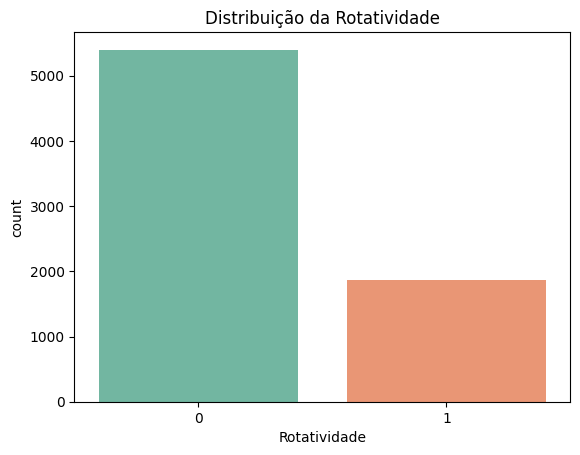

In [14]:
sns.countplot(x='Rotatividade', data=df, palette='Set2')
plt.title("Distribuição da Rotatividade")
plt.show()


# **Boxplots para numéricas**
Foi selecionado todas as colunas numéricas e mostrado histogramas para analisar a distribuição.
Isso ajuda a entender padrões, outliers e possíveis transformações necessárias.

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


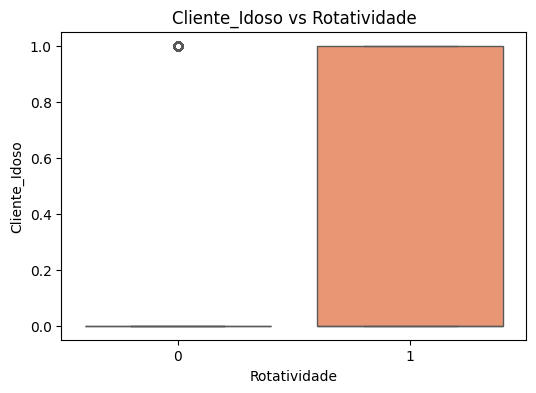

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


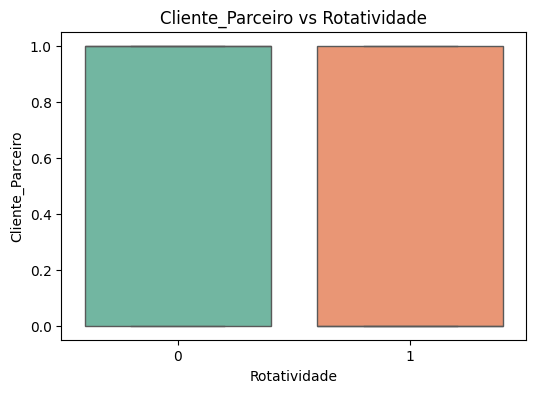

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


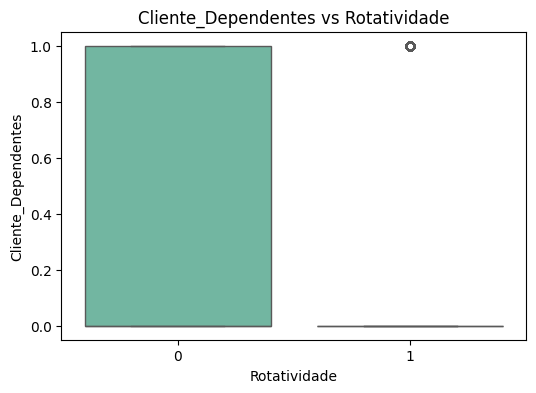

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


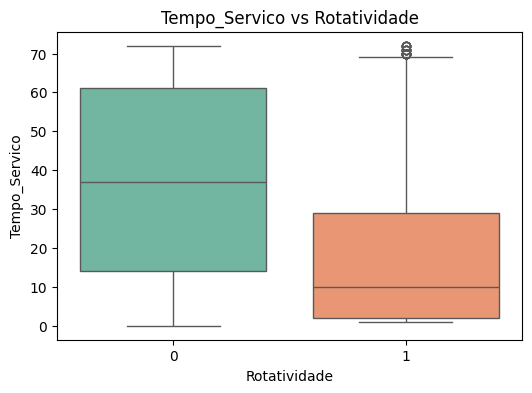

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


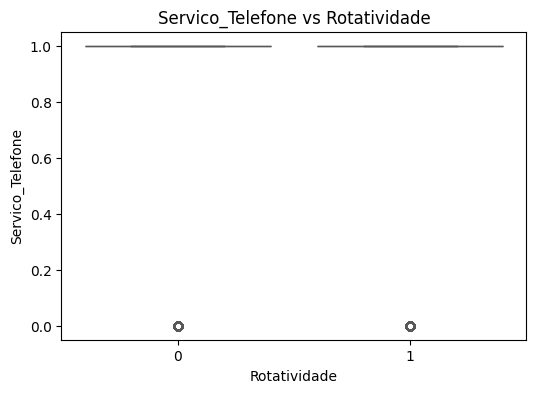

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


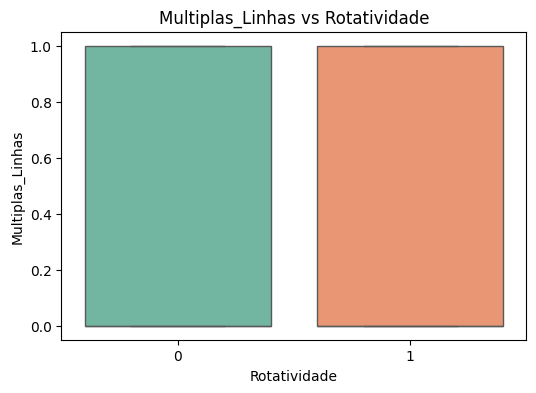

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


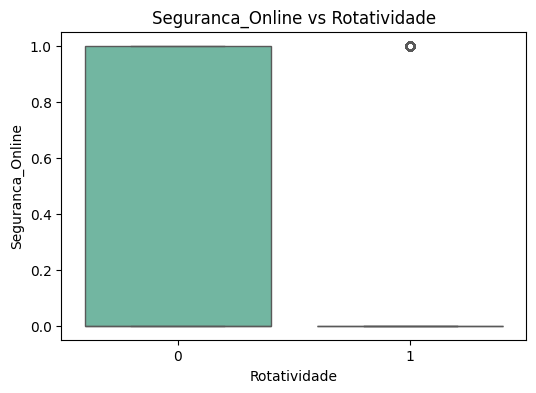

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


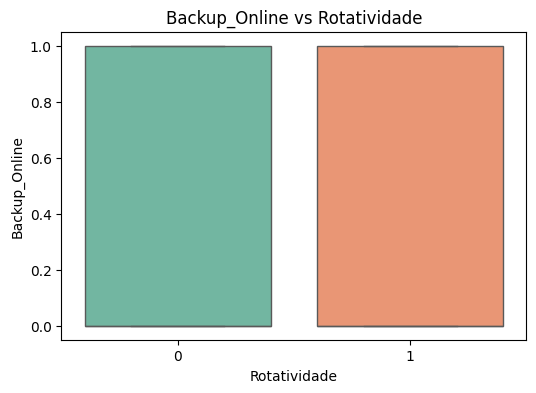

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


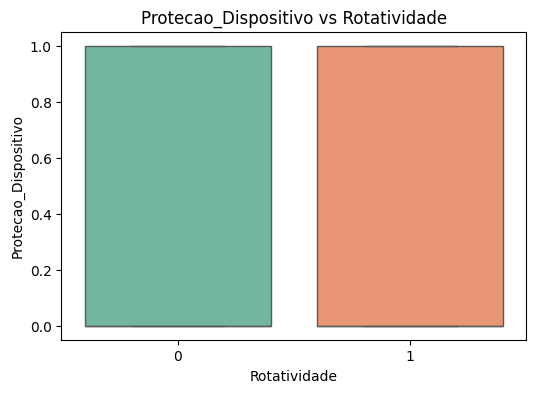

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


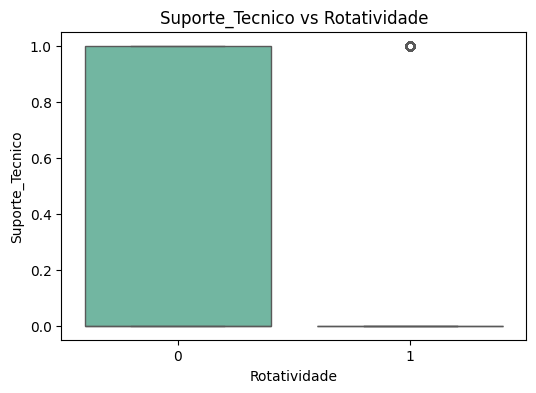

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


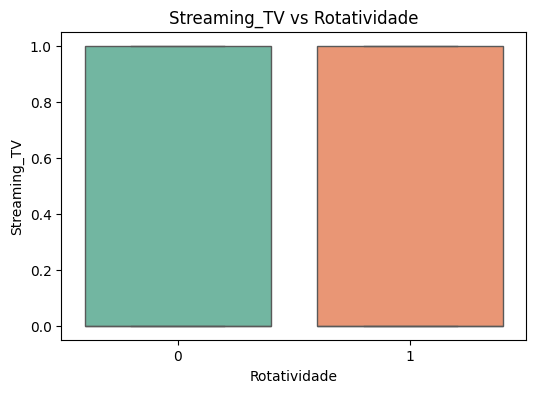

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


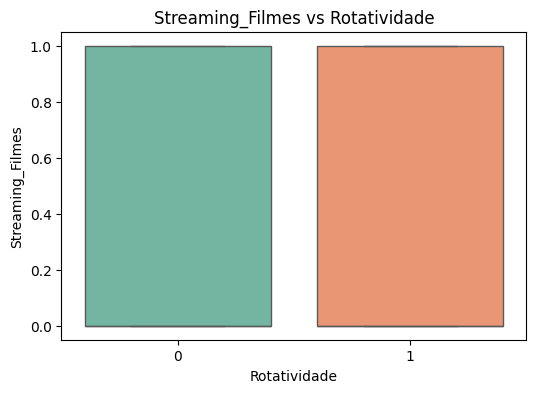

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


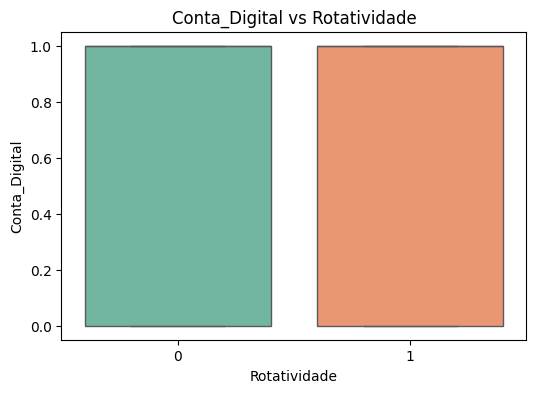

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


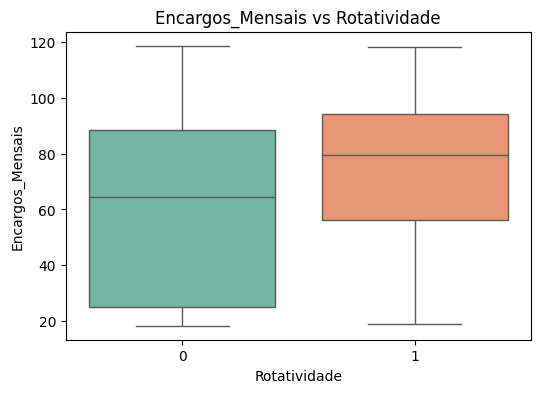

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


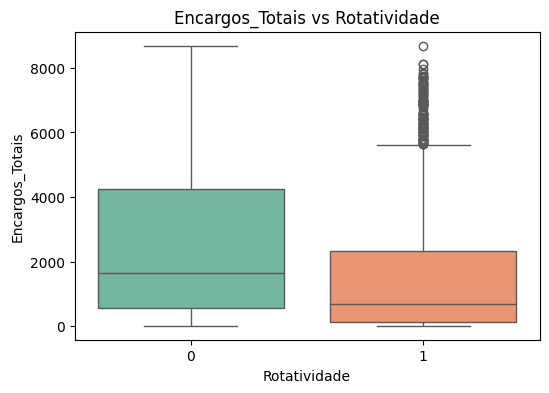

/tmp/ipython-input-2103753633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')


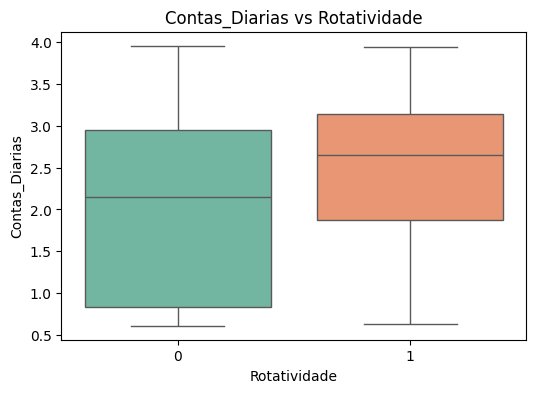

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [c for c in num_cols if c != 'Rotatividade']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Rotatividade', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Rotatividade")
    plt.show()

#**Codificação de variáveis categóricas**
Foi utilizado o *pd.get_dummies* para transformar variáveis categóricas em variáveis numéricas (One-Hot Encoding).
Isso é necessário porque modelos de machine learning não trabalham com textos diretamente.

In [16]:
cat_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(f"✅ Encoding concluído. Novo shape: {df_encoded.shape}")

✅ Encoding concluído. Novo shape: (7267, 25)


# **Correlação**
Foi calculado a correlação de todas as variáveis com a variável alvo "Rotatividade".
Isso serve para identificar quais atributos têm maior relação com o churn e são mais relevantes para o modelo.


🔎 Correlação com Rotatividade:
Rotatividade                               1.000000
Contrato_Conta_mensal                      0.395584
Servico_Internet_fibra óptica              0.300949
Metodo_Pagamento_cheque eletrônico         0.294626
Contas_Diarias                             0.189866
Encargos_Mensais                           0.189866
Conta_Digital                              0.186666
Cliente_Idoso                              0.146733
Streaming_TV                               0.062430
Streaming_Filmes                           0.060586
Multiplas_Linhas                           0.039343
Servico_Telefone                           0.012571
Sexo_Cliente_masculino                    -0.009555
Protecao_Dispositivo                      -0.063452
Backup_Online                             -0.080163
Metodo_Pagamento_cheque enviado           -0.090061
Metodo_Pagamento_transferência bancária   -0.114767
Cliente_Parceiro                          -0.148546
Suporte_Tecnico                 

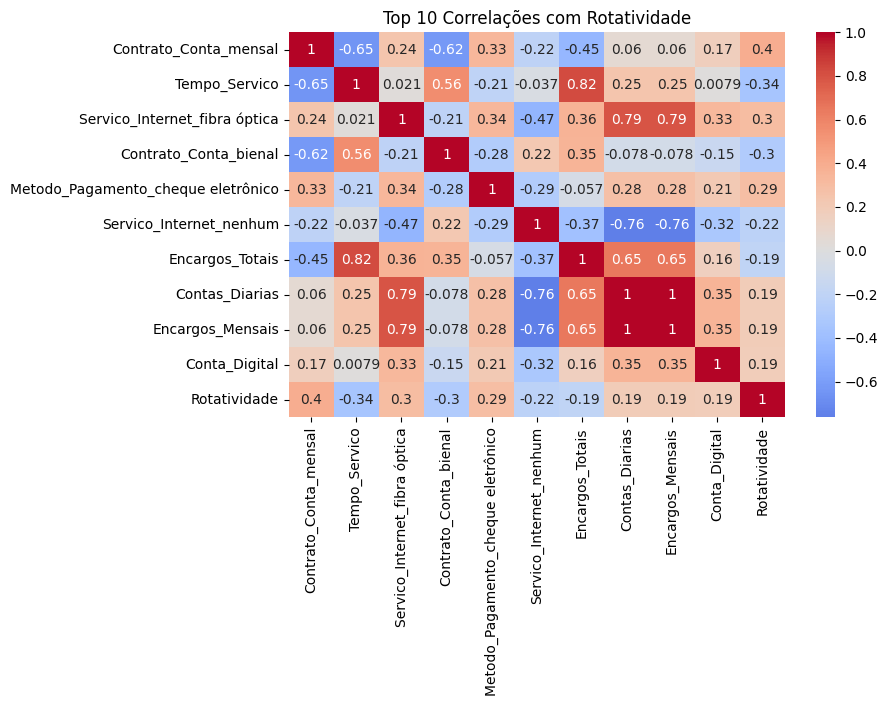

In [20]:
corr = df_encoded.corr()
target_corr = corr['Rotatividade'].sort_values(ascending=False)
print("\n🔎 Correlação com Rotatividade:")
print(target_corr)

# Heatmap das 10 mais correlacionadas
top_corr = target_corr.abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(8,5))
sns.heatmap(df_encoded[top_corr.index.tolist() + ['Rotatividade']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title("Top 10 Correlações com Rotatividade")
plt.show()

# **Treinamento do Modelo**
Foi criado a função *treinar_modelo* que:

* Separa features (X) e variável alvo (y);

* Divide os dados em treino e teste;

* Treina um modelo RandomForestClassifier;

* Avalia o desempenho com métricas como acurácia, precisão, recall e F1-score.


📈 Métricas do Modelo:
Acurácia: 0.78
Precisão: 0.60
Recall: 0.49
F1-Score: 0.54

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1080
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1454
   macro avg       0.71      0.69      0.70      1454
weighted avg       0.77      0.78      0.78      1454



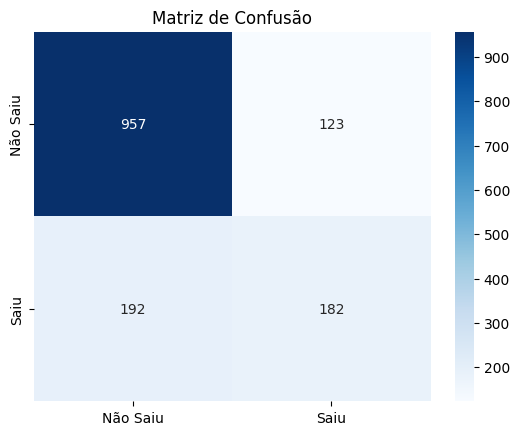

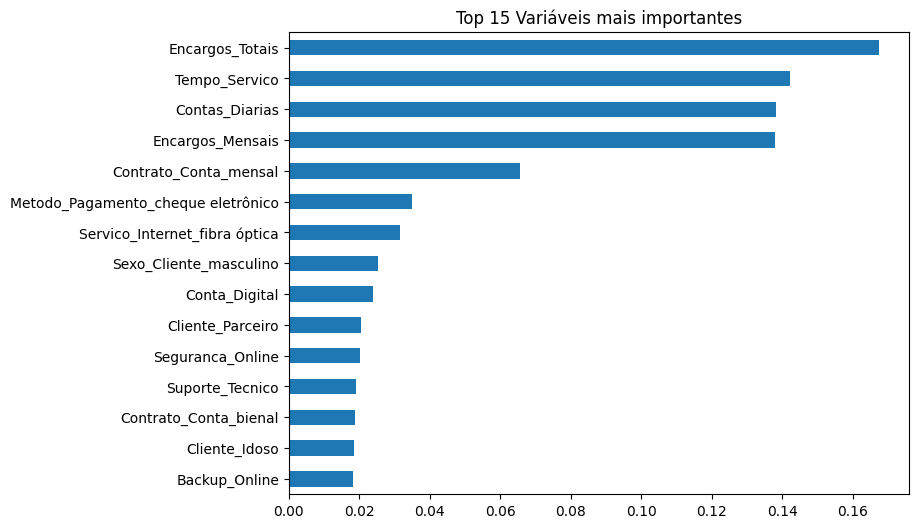

In [22]:
def treinar_modelo(df_encoded):
    """Treina e avalia um RandomForest para prever Rotatividade."""
    X = df_encoded.drop('Rotatividade', axis=1)
    y = df_encoded['Rotatividade']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    modelo = RandomForestClassifier(n_estimators=200, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Métricas
    print("\n📈 Métricas do Modelo:")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Saiu', 'Saiu'], yticklabels=['Não Saiu', 'Saiu'])
    plt.title("Matriz de Confusão")
    plt.show()

    # Importância das variáveis
    importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]
    importancias.plot(kind='barh', figsize=(8,6))
    plt.title("Top 15 Variáveis mais importantes")
    plt.gca().invert_yaxis()
    plt.show()

treinar_modelo(df_encoded)

# **✅ Conclusões e Insights**
O Modelo demonstrou ser eficaz na identificação dos clientes propensos à evasão (churn). As métricas de avaliação (precisão, recall, F1-score) mostram que o modelo tem uma boa capacidade de prever a rotatividade de clientes.

Com isso, os resultados do seu modelo indicam claramente que:

* **Tipo de Contrato:** O contrato mensal (Contrato_Conta_mensal) é o principal fator de risco para a rotatividade de clientes.

* **Gastos Totais:** O Total_Gasto também é uma feature significativa, sugerindo que o valor que o cliente gasta está diretamente relacionado ao seu risco de saída.

* **Tempo de Permanência:** A variável Meses_Com_Empresa também é um fator importante, indicando que clientes mais novos ou com pouco tempo de casa podem ter um risco maior de churn.

# **Recomendações**

1. **Foco em Clientes com Contratos Mensais:**

  * Criar uma campanha de retenção focada exclusivamente em clientes com contrato mensal. Oferecendo incentivos como descontos ou bônus para que eles mudem para um contrato anual ou bienal.

2. **Programa de Fidelidade e Engajamento:**

  * Desenvolver um programa de fidelidade que ofereça benefícios crescentes à medida que o tempo de permanência do cliente aumenta.

3. **Análise de Gastos e Experiência do Cliente:**

  * Investigar a fundo o que está por trás da feature *Total_Gasto*. Clientes com gastos altos podem ter maior expectativa de qualidade de serviço. Já clientes com gastos baixos podem não estar usando o serviço de forma satisfatória.